<a href="https://colab.research.google.com/github/sanketchavan5595/EDA-on-bestselling-books-on-Amazon-/blob/main/EDA_on_Bestseller_book_on_Amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory data analysis on bestselling books on Amazon

We will use various python libraries to analyse the data and gain the insights 

you can find the dataset [here](https://raw.githubusercontent.com/sanketchavan5595/EDA-on-bestselling-books-on-Amazon-/main/bestsellers%20with%20categories.csv)


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

In [2]:
url = 'https://raw.githubusercontent.com/sanketchavan5595/EDA-on-bestselling-books-on-Amazon-/main/bestsellers%20with%20categories.csv'
df = pd.read_csv(url)
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [4]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [5]:
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

There are no null values 

In [6]:
df.shape

(550, 7)

There are total of 550 books listed as bestsellers on amazon 


### Now let's take a look at the variables
* **Categorical variables**:
        - Genre
        - Year
* **Numerical variables**:
        - Reviews
        - User Rating
        - Price 


### Categorical variables

#### Genre

In [7]:
df.Genre.value_counts()

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

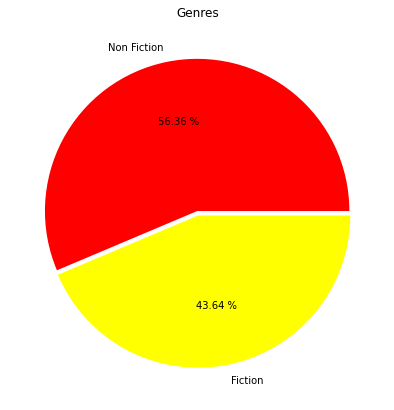

In [8]:
labels = list(df.Genre.value_counts().to_dict().keys())
non_fiction = list(df.Genre.value_counts().to_dict().values())[0]
fiction = list(df.Genre.value_counts().to_dict().values())[1]

plt.figure(figsize=(7,7))
plt.title("Genres")
explode = [0.01, 0.02]
colors = ['red', 'yellow']

plt.pie([non_fiction, fiction], 
        labels = labels, 
        autopct = '%.2f %%',
        explode = explode, 
        colors = colors);

**Non-Fiction books are more in number than the fiction books**

--

#### Year

In [9]:
df.Year.value_counts()

2019    50
2018    50
2017    50
2016    50
2015    50
2014    50
2013    50
2012    50
2011    50
2010    50
2009    50
Name: Year, dtype: int64

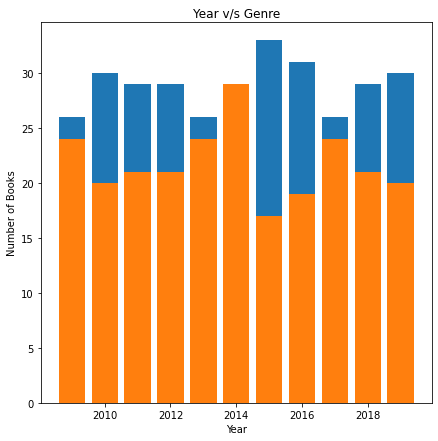

In [10]:
plt.figure(figsize=(7,7))
plt.title('Year v/s Genre')


plt.bar(df[df['Genre']== 'Non Fiction'].Year.value_counts().to_dict().keys(),
        df[df['Genre']== 'Non Fiction'].Year.value_counts().to_dict().values());


plt.bar(df[df['Genre']== 'Fiction'].Year.value_counts().to_dict().keys(),
        df[df['Genre']== 'Fiction'].Year.value_counts().to_dict().values());

plt.xlabel('Year')
plt.ylabel("Number of Books");


**Every year, more non-fiction books became bessellers than the fiction books; except in the year 2014, when more number of fiction books (29) became bestsellers than the non-fiction books (21)**



---

---





### Numerical variables

#### Reviews

In [11]:
df[['Name', 'Genre', 'Reviews']]

,Name,Genre,Reviews
0,10-Day Green Smoothie Cleanse,Non Fiction,17350
1,11/22/63: A Novel,Fiction,2052
2,12 Rules for Life: An Antidote to Chaos,Non Fiction,18979
3,1984 (Signet Classics),Fiction,21424
4,"5,000 Awesome Facts (About Everything!) (Natio...",Non Fiction,7665
...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Fiction,9413
546,You Are a Badass: How to Stop Doubting Your Gr...,Non Fiction,14331
547,You Are a Badass: How to Stop Doubting Your Gr...,Non Fiction,14331
548,You Are a Badass: How to Stop Doubting Your Gr...,Non Fiction,14331


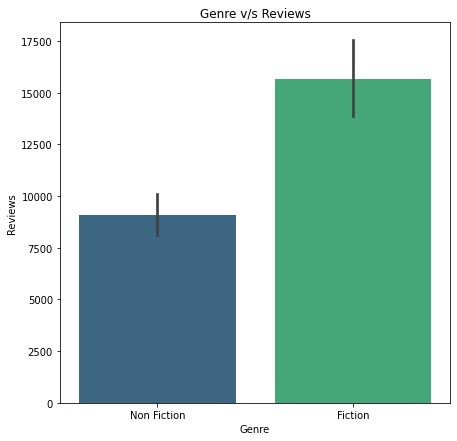

In [12]:
plt.figure(figsize=(7,7))
plt.title("Genre v/s Reviews")
sns.barplot(x = 'Genre',
            y = 'Reviews',
            palette = "viridis",
            data = df);

**Fiction books have more reviews than the Non-Fiction books**

--

#### User Rating

In [13]:
df[['Name', 'Genre', 'Price', 'User Rating']]

,Name,Genre,Price,User Rating
0,10-Day Green Smoothie Cleanse,Non Fiction,8,4.7
1,11/22/63: A Novel,Fiction,22,4.6
2,12 Rules for Life: An Antidote to Chaos,Non Fiction,15,4.7
3,1984 (Signet Classics),Fiction,6,4.7
4,"5,000 Awesome Facts (About Everything!) (Natio...",Non Fiction,12,4.8
...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Fiction,8,4.9
546,You Are a Badass: How to Stop Doubting Your Gr...,Non Fiction,8,4.7
547,You Are a Badass: How to Stop Doubting Your Gr...,Non Fiction,8,4.7
548,You Are a Badass: How to Stop Doubting Your Gr...,Non Fiction,8,4.7


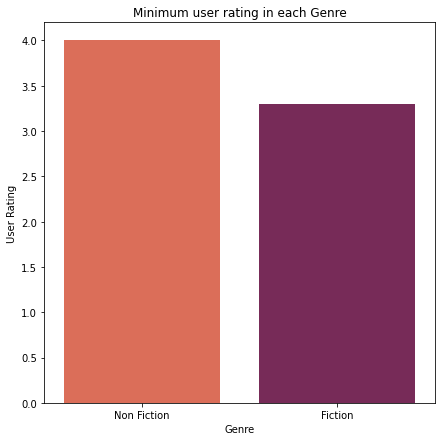

In [14]:
nf = df[df['Genre']== 'Non Fiction']['User Rating'].min()
f = df[df['Genre']== 'Fiction']['User Rating'].min()

plt.figure(figsize=(7,7))
plt.title("Minimum user rating in each Genre")
plt.xlabel('Genre')
plt.ylabel('User Rating')
sns.barplot(x= list(df.Genre.value_counts().to_dict().keys()), 
            y = [nf,f],
            palette = 'rocket_r');

**The minimum user rating in fiction genre is 3.3 whereas it is 4.0 in non-fiction genre**

--

#### Price

In [15]:
df[['Name', 'Price', 'User Rating', 'Reviews','Genre']]

,Name,Price,User Rating,Reviews,Genre
0,10-Day Green Smoothie Cleanse,8,4.7,17350,Non Fiction
1,11/22/63: A Novel,22,4.6,2052,Fiction
2,12 Rules for Life: An Antidote to Chaos,15,4.7,18979,Non Fiction
3,1984 (Signet Classics),6,4.7,21424,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",12,4.8,7665,Non Fiction
...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),8,4.9,9413,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,8,4.7,14331,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,8,4.7,14331,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,8,4.7,14331,Non Fiction


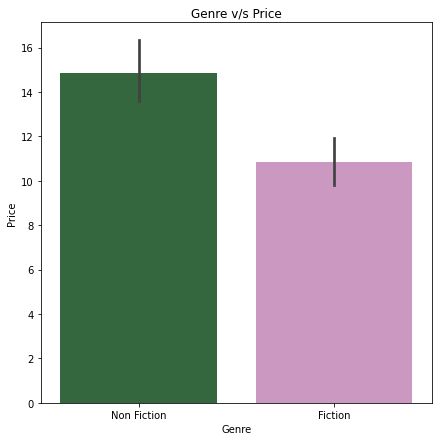

In [16]:
plt.figure(figsize=(7,7))

plt.title('Genre v/s Price')
sns.barplot(x = 'Genre',
            y = 'Price',
            palette= "cubehelix",
            data = df);

**Non fiction books are high-priced than the fiction books**

## --

---

---





# Deriving insights 

**Top 5 Authors with most number of books in each genre**

In [17]:
fiction_df = df[df['Genre']== 'Fiction']
fiction_df.Author.value_counts()[:5]

Jeff Kinney        12
Rick Riordan       11
Suzanne Collins    11
Dr. Seuss           9
Dav Pilkey          7
Name: Author, dtype: int64

In [18]:
non_fiction_df = df[df['Genre']== 'Non Fiction']
non_fiction_df.Author.value_counts()[:5]

Gary Chapman                          11
American Psychological Association    10
Gallup                                 9
Rob Elliott                            8
Stephen R. Covey                       7
Name: Author, dtype: int64



---






**Genre with the highest user ratings**

In [23]:
df1 = df.sort_values("User Rating", ascending = False)[df['User Rating'] == 4.9]
df1.Genre.value_counts()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Fiction        41
Non Fiction    11
Name: Genre, dtype: int64

**There are more fiction authors (41) with the user rating 4.9 than the non-fiction authors (11)**



---



**Year v/s Reviews**

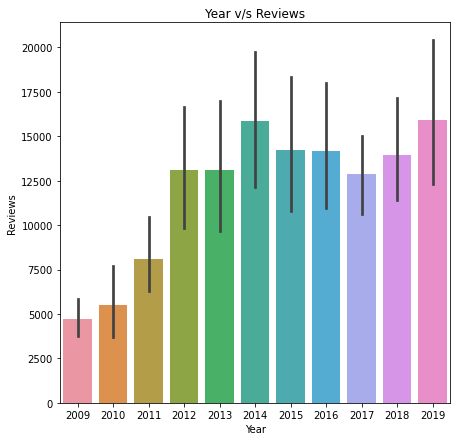

In [44]:
plt.figure(figsize=(7,7))
plt.title("Year v/s Reviews")

sns.barplot(x = 'Year',
            y = 'Reviews',
            data = df);

**Books released in the year 2014 and 2019 got more reviews than the books released in other years**



---



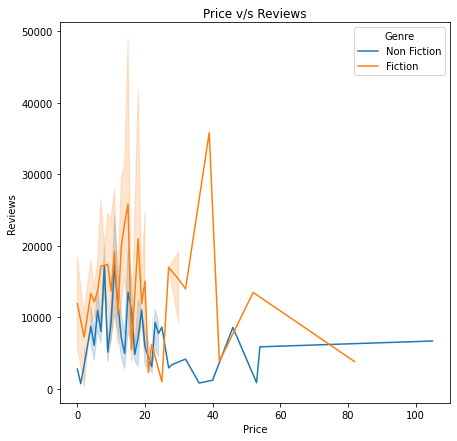

In [45]:
plt.figure(figsize=(7,7))

plt.title("Price v/s Reviews")
sns.lineplot(x = 'Price', 
             y = 'Reviews', 
             hue = 'Genre',
             data = df);

**Fiction book have more reviews than the non-fiction book but non-fiction books have higher prices**



---



**Price Distribution**

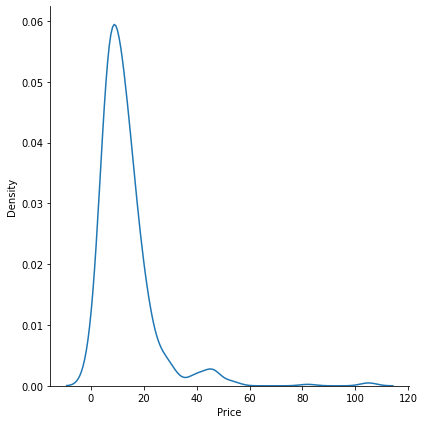

In [57]:
sns.displot(df['Price'], 
            kind ='kde',
            height = 6);

**Majority of the books are price between 0 to 20**



---



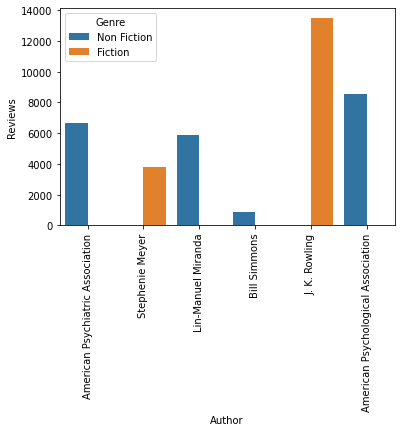

In [79]:
df_price = df.sort_values("Price", ascending= False)[['Author', 'Price', 'Genre', 'Reviews']].head(10)

plt.xticks(rotation = 90)
sns.barplot(x = 'Author', 
            y = 'Reviews', 
            data = df_price, hue = "Genre");


**Among the authors with high-priced books, J.K. Rowling has the most number of reviews**



---



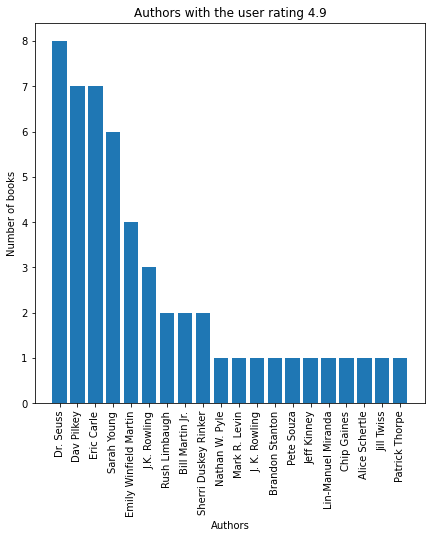

In [92]:
df_ur = df[df['User Rating']== 4.9][['Author', 'Genre']]


plt.figure(figsize=(7,7))
plt.title("Authors with the user rating 4.9")
plt.bar( df_ur.Author.value_counts().to_dict().keys(),
         df_ur.Author.value_counts().to_dict().values())
plt.xlabel("Authors")
plt.xticks(rotation = 90)
plt.ylabel("Number of books");

**Dr. Seuss has most number of books (8) with the user rating 4.9**

# References 
* https://pandas.pydata.org/docs/
* https://numpy.org/doc/
* https://seaborn.pydata.org/
* https://matplotlib.org/stable/index.html